In [1]:
#!/usr/bin/env python
# This script is adapted from Xie's and Ulissi's scripts.
# Load models

import numpy as np
import os.path
import pickle

from ase import io
from ase.build.surface import *
from ase.visualize import view

In [2]:
# Load images from traj file
images = io.read('./database/clean_images.traj', index=slice(None))

In [3]:
# Create your own images
with open('./database/MaterialDict.pkl', 'rb') as f:
    data = pickle.load(f, encoding='bytes')
data = {k.decode('utf8'): v for k, v in data.items()}

pure_cu = fcc111('Cu', size=(2,2,4), a=data['Cu'][b'qLattConst-PBE'])
pure_cu.center(vacuum=7.5, axis=2)

cu_ag_saa = fcc111('Ag', size=(2,2,4), a=data['Ag'][b'qLattConst-PBE'])
cu_ag_saa.center(vacuum=7.5, axis=2)
cu_ag_saa[-1].symbol ='Cu'
cu_ag_saa.center(vacuum=7.5, axis=2)

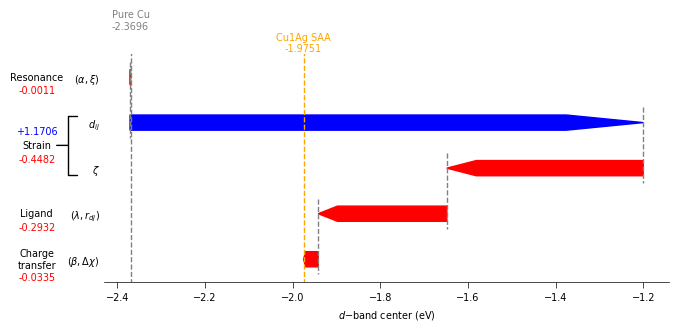

In [4]:
from d_center.tinnet.plot.plot_shap import Plot_SHAP
model = Plot_SHAP()

model.plot_shap(reference_image=pure_cu,
                reference_site_idx=15,
                reference_name='Pure Cu',
                target_image=cu_ag_saa,
                target_site_idx=15,
                target_name='Cu1Ag SAA')

# DFT calculated d-band center,
# Pure Cu: -2.3687 eV
# Cu1Ag SAA: -1.9636 eV

In [5]:
from d_moment.d_moment import d_moment

def print_moments(moments, name=""):
    second = moments[0]
    third = moments[1]
    fourth = moments[2]

    print(f"--- Moments for {name} ---")
    if second is not None:
        print(f"Second Moment  (⟨ε²⟩): {second:.5f}  → related to band width / energy spread")
    if third is not None:
        print(f"Third Moment   (⟨ε³⟩): {third:.5f}  → indicates asymmetry / skewness of DOS")
    if fourth is not None:
        print(f"Fourth Moment  (⟨ε⁴⟩): {fourth:.5f}  → measures kurtosis / 'tailedness' of DOS")
    print()

moments_ref, moments_target = d_moment(reference_image=pure_cu,
                                       reference_site_idx=15,
                                       reference_name='Pure Cu',
                                       target_image=cu_ag_saa,
                                       target_site_idx=15,
                                       target_name='Cu1Ag SAA')

print_moments(moments_ref, name="Pure Cu")
print_moments(moments_target, name="Cu1Ag SAA")

# DFT calculated d-band moments,
# Pure Cu: 1.1276, 1.2829, 12.2791
# Cu1Ag SAA: 0.7515, 0.2496, 9.3852

--- Moments for Pure Cu ---
Second Moment  (⟨ε²⟩): 1.17396  → related to band width / energy spread
Third Moment   (⟨ε³⟩): 1.32360  → indicates asymmetry / skewness of DOS
Fourth Moment  (⟨ε⁴⟩): 13.52467  → measures kurtosis / 'tailedness' of DOS

--- Moments for Cu1Ag SAA ---
Second Moment  (⟨ε²⟩): 0.84783  → related to band width / energy spread
Third Moment   (⟨ε³⟩): 0.56170  → indicates asymmetry / skewness of DOS
Fourth Moment  (⟨ε⁴⟩): 11.97915  → measures kurtosis / 'tailedness' of DOS



In [6]:
from cohesive_energy.cohesive_energy import cohesive_energy

def print_cohesive_energy(ech_ref, ech_target, reference_name='Reference', target_name='Target'):
    print("Cohesive Energy Comparison")
    print("=" * 30)
    print(f"{'Material':<15} {'Cohesive Energy (eV)':>20}")
    print("-" * 30)
    print(f"{reference_name:<15} {ech_ref:>20.4f}")
    print(f"{target_name:<15} {ech_target:>20.4f}")
    print("=" * 30)
    delta = ech_target - ech_ref
    print(f"Difference (target - reference): {delta:.4f} eV")

ech_ref, ech_target = cohesive_energy(reference_image=pure_cu,
                                      reference_name='Pure Cu',
                                      target_image=cu_ag_saa,
                                      target_name='Cu1Ag SAA')

print_cohesive_energy(ech_ref, ech_target, reference_name='Pure Cu', target_name='Cu1Ag SAA')

# DFT calculated cohesive energy,
# Pure Cu: -3.3077 eV
# Cu1Ag SAA: -2.4405 eV

Cohesive Energy Comparison
Material        Cohesive Energy (eV)
------------------------------
Pure Cu                      -5.4782
Cu1Ag SAA                    -3.8326
Difference (target - reference): 1.6457 eV


In [ ]:
from adsorption_energy_OH_top.adsorption_energy_OH_top import adsorption_energy_OH_top

def print_adsorption_energy(ead_ref, ead_target, reference_name='Reference', target_name='Target'):
    print("Adsorption Energy Comparison (OH-top)")
    print("=" * 40)
    print(f"{'Material':<15} {'Adsorption Energy (eV)':>25}")
    print("-" * 40)
    print(f"{reference_name:<15} {ead_ref:>25.4f}")
    print(f"{target_name:<15} {ead_target:>25.4f}")
    print("=" * 40)
    delta = ead_target - ead_ref
    print(f"Difference (target - reference): {delta:.4f} eV")

ead_ref, ead_target = adsorption_energy_OH_top(reference_image=pure_cu,
                                               reference_site_idx=15,
                                               reference_name='Pure Cu',
                                               target_image=cu_ag_saa,
                                               target_site_idx=15,
                                               target_name='Cu1Ag SAA')

print_adsorption_energy(ead_ref, ead_target, reference_name='Pure Cu', target_name='Cu1Ag SAA')

# DFT calculated adsorption energy,
# Pure Cu: -2.1967 eV
# Cu1Ag SAA: eV

Adsorption Energy Comparison (OH-top)
Material           Adsorption Energy (eV)
----------------------------------------
Pure Cu                           -2.1897
Cu1Ag SAA                         -2.3496
Difference (target - reference): -0.1599 eV
